## Week3 assignment 1

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import re


## Read Data

In [ ]:
#reading the csv file
data = pd.read_csv("/content/Data-cleaning-for-beginners-using-pandas.csv")


In [ ]:
data

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66.0,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,2,NaN,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,3,64.0,$44k-$99k,4.4,"India, In",1988,-1
4,4,25.0,$44k-$99k,6.4,"Australia, Aus",2002,-1
5,5,44.0,$77k-$89k,1.4,"India,In",1999,TRUE
6,6,21.0,$44k-$99k,0.0,"New York,Ny",-1,-1
7,7,44.0,$44k-$99k,-1.0,"Australia, Aus",-1,-1
8,8,35.0,$44k-$99k,5.4,"New York,Ny",-1,-1
9,9,22.0,$44k-$99k,7.7,"India,In",-1,TRUE


In [ ]:
#displaying top rows of the data set
data.head()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66.0,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,2,NaN,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,3,64.0,$44k-$99k,4.4,"India, In",1988,-1
4,4,25.0,$44k-$99k,6.4,"Australia, Aus",2002,-1


In [ ]:
#displaying bottom rows
data.tail()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
24,24,13.0,$44k-$99k,-1.0,"New York,Ny",1987,-1
25,25,55.0,$44k-$99k,0.0,"Australia, Aus",1980,TRUE
26,26,NaN,$55k-$66k,NaN,"India,In",1934,TRUE
27,27,52.0,$44k-$99k,5.4,"India,In",1935,-1
28,28,NaN,$39k-$88k,3.4,"Australia, Aus",1932,-1


In [ ]:
#number of rows and columns
data.shape

(29, 7)

In [ ]:
#summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Index        29 non-null     int64  
 1   Age          22 non-null     float64
 2   Salary       29 non-null     object 
 3   Rating       28 non-null     float64
 4   Location     29 non-null     object 
 5   Established  29 non-null     int64  
 6   Easy Apply   29 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.7+ KB


In [ ]:
#to check any null values in the data set
data.isnull().sum()

Index          0
Age            7
Salary         0
Rating         1
Location       0
Established    0
Easy Apply     0
dtype: int64

In [ ]:
data.columns

Index(['Index', 'Age', 'Salary', 'Rating', 'Location', 'Established',
       'Easy Apply'],
      dtype='object')

## **Salary column**

In [ ]:
temp_data = pd.DataFrame(data).copy()
temp_data


,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66.0,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,2,NaN,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,3,64.0,$44k-$99k,4.4,"India, In",1988,-1
4,4,25.0,$44k-$99k,6.4,"Australia, Aus",2002,-1
5,5,44.0,$77k-$89k,1.4,"India,In",1999,TRUE
6,6,21.0,$44k-$99k,0.0,"New York,Ny",-1,-1
7,7,44.0,$44k-$99k,-1.0,"Australia, Aus",-1,-1
8,8,35.0,$44k-$99k,5.4,"New York,Ny",-1,-1
9,9,22.0,$44k-$99k,7.7,"India,In",-1,TRUE


In [ ]:

# Regular expression to match the pattern "$xxk-$xxk"
pattern = re.compile(r'\$(\d+)k-\$(\d+)k')

# Function to convert 'k' to '000' for a salary range
def convert_range_to_thousands(match):
    start_salary = match.group(1) + '000'
    end_salary = match.group(2) + '000'
    return f"{start_salary}-{end_salary}"

# Apply the regular expression and conversion function to the entire column
temp_data['Salary'] = temp_data['Salary'].apply(lambda x: re.sub(pattern, convert_range_to_thousands, x))

# Display the modified DataFrame
temp_data

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,44000-99000,5.4,"India,In",1999,TRUE
1,1,66.0,55000-66000,3.5,"New York,Ny",2002,TRUE
2,2,NaN,77000-89000,-1.0,"New York,Ny",-1,-1
3,3,64.0,44000-99000,4.4,"India, In",1988,-1
4,4,25.0,44000-99000,6.4,"Australia, Aus",2002,-1
5,5,44.0,77000-89000,1.4,"India,In",1999,TRUE
6,6,21.0,44000-99000,0.0,"New York,Ny",-1,-1
7,7,44.0,44000-99000,-1.0,"Australia, Aus",-1,-1
8,8,35.0,44000-99000,5.4,"New York,Ny",-1,-1
9,9,22.0,44000-99000,7.7,"India,In",-1,TRUE


## Age column

In [ ]:
#filling the missing age value with the average age
avg_age = temp_data['Age'].mean()
avg_age

39.04545454545455

In [ ]:
# fill the missing values with mean
temp_data['Age'] = temp_data.Age.fillna(avg_age)
temp_data['Age'] = temp_data.Age.round(decimals=1)

In [ ]:
temp_data

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,44000-99000,5.4,"India,In",1999,TRUE
1,1,66.0,55000-66000,3.5,"New York,Ny",2002,TRUE
2,2,39.0,77000-89000,-1.0,"New York,Ny",-1,-1
3,3,64.0,44000-99000,4.4,"India, In",1988,-1
4,4,25.0,44000-99000,6.4,"Australia, Aus",2002,-1
5,5,44.0,77000-89000,1.4,"India,In",1999,TRUE
6,6,21.0,44000-99000,0.0,"New York,Ny",-1,-1
7,7,44.0,44000-99000,-1.0,"Australia, Aus",-1,-1
8,8,35.0,44000-99000,5.4,"New York,Ny",-1,-1
9,9,22.0,44000-99000,7.7,"India,In",-1,TRUE


## Established column

In [ ]:
temp_data['Established'] = temp_data['Established'].replace('-1', 'NaN')
print(temp_data)
r =temp_data.dtypes
print(r)

    Index   Age        Salary  Rating        Location  Established Easy Apply
0       0  44.0   44000-99000     5.4        India,In         1999       TRUE
1       1  66.0   55000-66000     3.5     New York,Ny         2002       TRUE
2       2  39.0   77000-89000    -1.0     New York,Ny           -1         -1
3       3  64.0   44000-99000     4.4       India, In         1988         -1
4       4  25.0   44000-99000     6.4  Australia, Aus         2002         -1
5       5  44.0   77000-89000     1.4        India,In         1999       TRUE
6       6  21.0   44000-99000     0.0     New York,Ny           -1         -1
7       7  44.0   44000-99000    -1.0  Australia, Aus           -1         -1
8       8  35.0   44000-99000     5.4     New York,Ny           -1         -1
9       9  22.0   44000-99000     7.7        India,In           -1       TRUE
10     10  55.0   10000-49000     5.4        India,In         2008       TRUE
11     11  44.0   10000-49000     6.7        India,In         20

In [ ]:

# Set values to NaN where the value is -1 in the "Established" column since we cannont assign average of all other established year
temp_data.loc[temp_data['Established'] == -1, 'Established'] = pd.NA
# Convert the "Established" column to integers
temp_data['Established'] = temp_data['Established'].astype('Int64')
temp_data

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,44000-99000,5.4,"India,In",1999,TRUE
1,1,66.0,55000-66000,3.5,"New York,Ny",2002,TRUE
2,2,39.0,77000-89000,-1.0,"New York,Ny",<NA>,-1
3,3,64.0,44000-99000,4.4,"India, In",1988,-1
4,4,25.0,44000-99000,6.4,"Australia, Aus",2002,-1
5,5,44.0,77000-89000,1.4,"India,In",1999,TRUE
6,6,21.0,44000-99000,0.0,"New York,Ny",<NA>,-1
7,7,44.0,44000-99000,-1.0,"Australia, Aus",<NA>,-1
8,8,35.0,44000-99000,5.4,"New York,Ny",<NA>,-1
9,9,22.0,44000-99000,7.7,"India,In",<NA>,TRUE


## Rating column

In [ ]:
# Calculate the average rating excluding NaN
average_rating = temp_data.loc[temp_data['Rating'].notna(), 'Rating'].mean()

# Replace missing values (NaN) with the average rating
temp_data['Rating'] = temp_data['Rating'].fillna(average_rating)
# Rescale the "Rating" values to be between 0 and 10
min_rating = 0
max_rating = 10
temp_data['Rating'] = ((temp_data['Rating'] - temp_data['Rating'].min()) / (temp_data['Rating'].max() - temp_data['Rating'].min())) * (max_rating - min_rating) + min_rating

# Round the "Rating" values to one decimal point
temp_data['Rating'] = temp_data['Rating'].round(1)
temp_data

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,44000-99000,7.3,"India,In",1999,TRUE
1,1,66.0,55000-66000,5.1,"New York,Ny",2002,TRUE
2,2,39.0,77000-89000,0.0,"New York,Ny",<NA>,-1
3,3,64.0,44000-99000,6.1,"India, In",1988,-1
4,4,25.0,44000-99000,8.4,"Australia, Aus",2002,-1
5,5,44.0,77000-89000,2.7,"India,In",1999,TRUE
6,6,21.0,44000-99000,1.1,"New York,Ny",<NA>,-1
7,7,44.0,44000-99000,0.0,"Australia, Aus",<NA>,-1
8,8,35.0,44000-99000,7.3,"New York,Ny",<NA>,-1
9,9,22.0,44000-99000,9.9,"India,In",<NA>,TRUE


## Easy Apply column

In [ ]:
# Change the name of the "Easy Apply" column to "Easy_Apply"
temp_data = temp_data.rename(columns={'Easy Apply': 'Easy_Apply'})
# Replace -1 with False in the "Easy_Apply" column
temp_data['Easy_Apply'] = temp_data['Easy_Apply'].replace('-1', 'FALSE')
temp_data

,Index,Age,Salary,Rating,Location,Established,Easy_Apply
0,0,44.0,44000-99000,7.3,"India,In",1999,TRUE
1,1,66.0,55000-66000,5.1,"New York,Ny",2002,TRUE
2,2,39.0,77000-89000,0.0,"New York,Ny",<NA>,FALSE
3,3,64.0,44000-99000,6.1,"India, In",1988,FALSE
4,4,25.0,44000-99000,8.4,"Australia, Aus",2002,FALSE
5,5,44.0,77000-89000,2.7,"India,In",1999,TRUE
6,6,21.0,44000-99000,1.1,"New York,Ny",<NA>,FALSE
7,7,44.0,44000-99000,0.0,"Australia, Aus",<NA>,FALSE
8,8,35.0,44000-99000,7.3,"New York,Ny",<NA>,FALSE
9,9,22.0,44000-99000,9.9,"India,In",<NA>,TRUE


# Location column



In [ ]:

# Remove values after "," in the "Location" column
temp_data['Location'] = temp_data['Location'].str.split(',').str[0]
temp_data

,Index,Age,Salary,Rating,Location,Established,Easy_Apply
0,0,44.0,44000-99000,7.3,India,1999,TRUE
1,1,66.0,55000-66000,5.1,New York,2002,TRUE
2,2,39.0,77000-89000,0.0,New York,<NA>,FALSE
3,3,64.0,44000-99000,6.1,India,1988,FALSE
4,4,25.0,44000-99000,8.4,Australia,2002,FALSE
5,5,44.0,77000-89000,2.7,India,1999,TRUE
6,6,21.0,44000-99000,1.1,New York,<NA>,FALSE
7,7,44.0,44000-99000,0.0,Australia,<NA>,FALSE
8,8,35.0,44000-99000,7.3,New York,<NA>,FALSE
9,9,22.0,44000-99000,9.9,India,<NA>,TRUE


In [ ]:
# Create a copy of the DataFrame
final_data_copy_week3_1 = temp_data.copy()

# Save the copy to a CSV file
final_data_copy_week3_1.to_csv('/final_data_copy_week3_1.csv', index=False)

## Week3 assignment 2

In [ ]:
data_frame = pd.read_csv("/content/chipotle.tsv",sep='\t')
df=data_frame.copy()

In [ ]:
data_frame.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
# Find missing values in each column
missing_values = df.isna().sum()

# Display the count of missing values in each column
print(missing_values)

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64


In [ ]:
# Check data types of each column
data_types = df.dtypes

# Display the data types of each column
print(data_types)

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object


In [ ]:

# Check for duplicate rows
duplicates = df.duplicated()

# Display rows that are duplicates
print(df[duplicates])

      order_id  quantity                            item_name  \
238        103         1                        Steak Burrito   
248        108         1                          Canned Soda   
297        129         1                        Steak Burrito   
381        165         1                    Canned Soft Drink   
484        205         1                         Chicken Bowl   
567        233         1                    Canned Soft Drink   
617        254         1                                Chips   
684        282         1                    Canned Soft Drink   
773        319         1                         Chicken Bowl   
908        376         1                        Steak Burrito   
924        381         1                   Chicken Soft Tacos   
1003       412         1                        Bottled Water   
1117       462         1                      Chicken Burrito   
1203       491         1                      Chicken Burrito   
1245       507         1 

In [ ]:
# Count the number of duplicate rows
num_duplicates = df.duplicated().sum()
print(f'\nNumber of duplicate rows: {num_duplicates}')


Number of duplicate rows: 59


In [ ]:
# Remove duplicate rows and update the DataFrame
df = df.drop_duplicates(keep='first')
print(df)

      order_id  quantity                              item_name  \
0            1         1           Chips and Fresh Tomato Salsa   
1            1         1                                   Izze   
2            1         1                       Nantucket Nectar   
3            1         1  Chips and Tomatillo-Green Chili Salsa   
4            2         2                           Chicken Bowl   
...        ...       ...                                    ...   
4617      1833         1                          Steak Burrito   
4618      1833         1                          Steak Burrito   
4619      1834         1                     Chicken Salad Bowl   
4620      1834         1                     Chicken Salad Bowl   
4621      1834         1                     Chicken Salad Bowl   

                                     choice_description item_price  
0                                                   NaN     $2.39   
1                                          [Clementine]  

In [ ]:
# Check for values that don't follow a pattern (e.g., numbers)
pattern = re.compile(r'\d+')
inconsistent_values = df['order_id'][~df['order_id'].astype(str).str.match(pattern)]
print(inconsistent_values)


Series([], Name: order_id, dtype: int64)


In [ ]:
# Check for values that don't follow a pattern (e.g., numbers)
pattern = re.compile(r'\d+')
inconsistent_values = df['quantity'][~df['quantity'].astype(str).str.match(pattern)]
print(inconsistent_values)


Series([], Name: quantity, dtype: int64)


In [ ]:
# Remove square brackets from "choice_description" column
df['choice_description'] = df['choice_description'].str.replace('[\[\]]', '', regex=True)
df

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,Clementine,$3.39
2,1,1,Nantucket Nectar,Apple,$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...",$11.75
4618,1833,1,Steak Burrito,"Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...",$11.75
4619,1834,1,Chicken Salad Bowl,"Fresh Tomato Salsa, Fajita Vegetables, Pinto B...",$11.25
4620,1834,1,Chicken Salad Bowl,"Fresh Tomato Salsa, Fajita Vegetables, Lettuce",$8.75


In [ ]:
# Check for unexpected values or patterns in "order_ID"
unexpected_values = df[df['order_id'].apply(lambda x: not str(x).isdigit())]
print("Unexpected values in 'order_id':")
print(unexpected_values)

# Check for zero or negative values in "order_ID"
negative_values = df[df['order_id'] <= 0]
print("Negative or zero values in 'order_id':")
print(negative_values)

Unexpected values in 'order_id':
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []
Negative or zero values in 'order_id':
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []


In [ ]:
# Remove "$" sign from "item_price" column
df.loc[:, 'item_price'] = df['item_price'].str.replace('$', '')

# Convert the "item_price" column to numeric
df.loc[:, 'item_price'] = pd.to_numeric(df['item_price'], errors='coerce')
df

<ipython-input-135-7db6379952d8>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.loc[:, 'item_price'] = df['item_price'].str.replace('$', '')
<ipython-input-135-7db6379952d8>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'item_price'] = pd.to_numeric(df['item_price'], errors='coerce')


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,Clementine,3.39
2,1,1,Nantucket Nectar,Apple,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"Tomatillo-Red Chili Salsa (Hot), Black Beans, ...",16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"Fresh Tomato Salsa, Rice, Black Beans, Sour Cr...",11.75
4618,1833,1,Steak Burrito,"Fresh Tomato Salsa, Rice, Sour Cream, Cheese, ...",11.75
4619,1834,1,Chicken Salad Bowl,"Fresh Tomato Salsa, Fajita Vegetables, Pinto B...",11.25
4620,1834,1,Chicken Salad Bowl,"Fresh Tomato Salsa, Fajita Vegetables, Lettuce",8.75


In [ ]:
# Check for missing values in critical columns
critical_columns = ["item_name", "choice_description", "quantity", "item_price"]
missing_values = df[critical_columns].isna().sum()
print("Missing values:")
print(missing_values)

# Check for duplicate entries based on key columns ("Item" and "Description")
key_columns = ["item_name", "choice_description","order_id","quantity","item_price","item_name"]
duplicates = df.duplicated(subset=key_columns, keep=False)
duplicate_entries = df[duplicates]
print("\nDuplicate entries:")
print(duplicate_entries)

# Check for negative or zero values in "Quantity" and "Price"
negative_values_quantity = df[df['quantity'] <= 0]
negative_values_price = df[df['item_price'] <= 0]
print("\nNegative or zero values in 'Quantity':")
print(negative_values_quantity)
print("\nNegative or zero values in 'Price':")
print(negative_values_price)

Missing values:
item_name                0
choice_description    1228
quantity                 0
item_price               0
dtype: int64

Duplicate entries:
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []

Negative or zero values in 'Quantity':
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []

Negative or zero values in 'Price':
Empty DataFrame
Columns: [order_id, quantity, item_name, choice_description, item_price]
Index: []


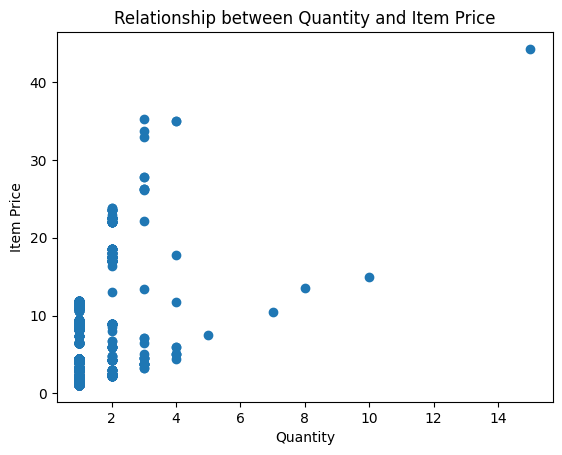

In [ ]:
import matplotlib.pyplot as plt
# Scatter plot
plt.scatter(df['quantity'], df['item_price'])
plt.xlabel('Quantity')
plt.ylabel('Item Price')
plt.title('Relationship between Quantity and Item Price')
plt.show()

In [ ]:
# Create a copy of the DataFrame
final_data_copy_week3_2 = df.copy()

# Save the copy to a CSV file
final_data_copy_week3_2.to_csv('/final_data_copy_week3_2.csv', index=False)